# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

### Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:

- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain missing or censored values and have been removed.

- 1 data point has an `'RM'` value of 8.78. This data point can be considered an outlier and has been removed.

- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining non-relevant features have been excluded.

- The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".
      format(*data.shape))


/Users/michaelreinhardme.com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/michaelreinhardme.com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/michaelreinhardme.com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/michaelreinhardme.com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/michaelreinhardme.com/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor o

Boston housing dataset has 489 data points with 4 variables each.


/Users/michaelreinhardme.com/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/Users/michaelreinhardme.com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into features and the target variable. The features, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The target variable, `'MEDV'`, will be the variable we seek to predict. These are stored in features and prices, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since numpy has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:

- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in prices.

- Store each calculation in their respective variable.

In [2]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))


Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):

- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of `'MEDV'` or a decrease in the value of `'MEDV'`? Justify your answer for each.

**Answer**

We have three features in the data set: the average number of rooms among homes in the neighborhood (`RM`), the percentage of homeowners in the neighborhood that are classified as working poor (`LSTAT`), and the ratio of students to teachers in the neighborhood schools (`PTRATIO`). The first is expected to be associated with higher housing prices, the second and third with lower.

The rationale for average room number to be positively associated with prices is obvious: more rooms tend to be associated with bigger houses and bigger houses with housing price.

The proportion of working class homeowners' relationship to price is negative. The poor poor--the non-working poor--do not generally own their own homes so the working poor are generally the lowest income group that owns property. So having a higher proportion of working poor homeowners is indicative of a lower income neighborhood and lower housing prices. The same is true of the student teacher ratio. A higher ratio of students to teachers is an indicator of less money being spent on schools and, in general, of less money. Less money, or more people who have less money, is a sign of a poorer and, therefore, less desirable neighborhood. 

As the desirability of the neighborhood is a cheif determinant of the cost of housing we expect both the proportion of working poor home owners and the student teacher ratio of be associated with lower housing prices.

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


Would you consider this model to have successfully captured the variation of the target variable?
Why or why not?

**Answer**  
The model has an $R^2$ of $0.923$, implying that over $92\%$ of the observered variation in housing prices in the Boston area can be accounted for by the factors in the model. 

This is by any standard impressive. Knowning the average number of rooms among houses, the proportion of working poor among homeowners, and the student teacher ratio among the schools in a neighborhood allows one to predict the price of a house within, on average, less than $10\%$ of the actual price. This without knowing anything about the particular house in question.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the features and prices data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state=47)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing  
What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Answer**  
The benefit of training the model and testing it on different segements of the same data set is self-evident: you test the model on data that it hasn't seen. By randominzing the subsets of the data that the model is trained on you minimize the danger that the model will learn idiosyncratic features of the data set and maximize the likelihood that the model will focus on general sources of variation.

If we trained and tested on the same data the danger would be that the machine learning model would overfit, i.e, it would learn the data too well. It would predict the data set because is would have learned the data, not the underlying causal process. Spliting the data into training and testing subsets avoids this danger. Some of the idiosyncratic features will be in the training portion of the data but this will be offset by some of the idiosyncratic fetures being in the testing set. The specious accuracy gained on the training end will be compensated for and penalized on the testing end.

## Analyzing Model Performance  
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

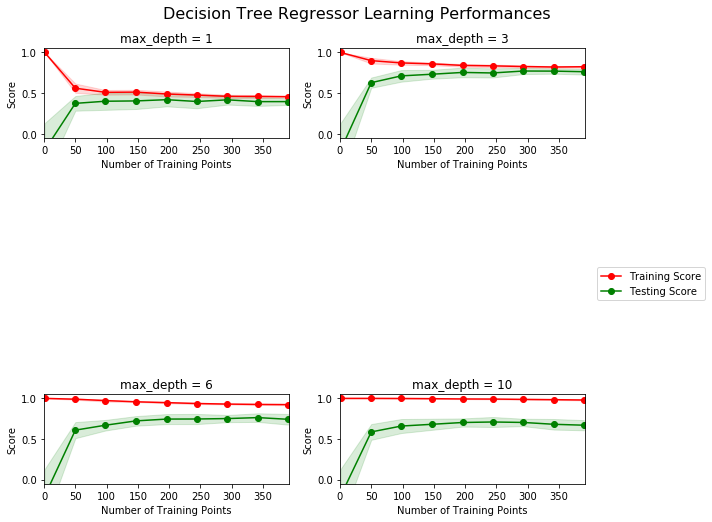

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Answer**  
Consider the graph for the tree model with a max depth of 3. It is clear that this model outperforms the other specifications. Though all models tend to improve as more data is added for them to train on, there is clearly a 'sweet spot' for the training depth. At a max depth of one the model learns only one feature. There is no danger of overfitting so the performance of the model on the training data and the testing data quickly converge, but they converge at a lower level of performance, explaining less than half the variation in the data.

At the other extreme, a max depth of 10, the problems are reversed. The model performs only too well on the training data, learning it almost perfectly. But when confronted with data that is hasn't seen before in the testing set, it fails. The patterns that it has learned from the data of the training set are not generalizable to the wider world as eviced by the poor performance on the testing set. The performance of the model on the training and testing sets do not converge, with performance on the training set staying close to a perfect 1 while performance on the testing set tops out at well under 80%.

The model with a max depth of 3 represents the better trade-off. The performance of the model on the training set it good but not too good, stablizing at over 80%. But the performance of the model on the training set is largely maintained on the testing set, with the model doing almost as well on the testing set as on the training set. The model gets almost 80% on the testing set and almost converging with its performance on the training set. The max depth of 3 allows the model to learn the training set but not over learn it.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

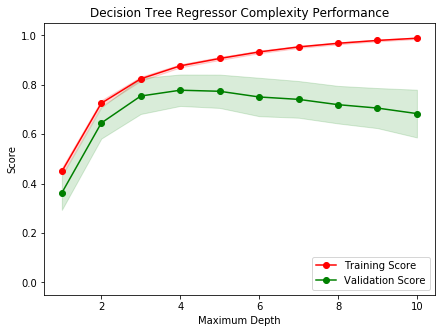

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Answer**  
At a maximum depth of 1 the model is all bias and no variance. It picks up only the most general tendancies in the data set and remains insensitive to much of the variance in the both the training data and the testing data.

At a max depth of 10 the problems are reversed. The performance of the model on the training data increases as the depth of the tree in increased, but its performance on the training data regresses. After a depth of about 3 or 4 performance on the testing set stops increasing and goes into reverse, going from about 75% at 3 or 4 and declining to somewhere in the 60s at a max depth of 10. The variation learned by the model on the training set includes too much variation that is not generalizable to the real world.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

**Answer**  
I conclude that the optimal depth for the tree model on this data is 3 or 4. Beyond that the variation learned by the model does not generalize to the testing set and, thus, not, in all likelihood, the the real world.

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.


### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

**Answer**  
Grid Search refers to an exhaustive trial of all possible combinations of parameters to a model to determine which combination yeilds the model that best summarizes the data. The parameters--the characteristics of the model that the researcher controls--are specified in a grid. All combinations of the parameter grid are then ran and evaluated to see which combination performs best. 

The procedure of going through the combinations is necessary becuase the different specifications of the parameters may interact and react on one another. One parameter may increase the accuracy of the model in isolation but have a deliterious effect in the presence of another. The grid search insures that the set of model parameters selected is the best of all possible combinations.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Answer**  
The k-fold training technique divides the training data into k number of segments or subsets, each of which serves as the test set in succession while the remaining subsets serve as the training set. The benefit of the technique is as a guard to overfitting. Any idiosyncracies in the data will be cancelled out.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = None)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

/Users/michaelreinhardme.com/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

Question 9 - Optimal Model
What maximum depth does the optimal model have? How does this result compare to your guess in Question 6?
Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


*Answer*  
The optimal depth for the decision tree model is 4. This tracks with the answer obtained by visual inspection of the complexity-performance graph displayed above.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $404,968.42
Predicted selling price for Client 2's home: $166,350.00
Predicted selling price for Client 3's home: $913,309.09


**Answer**  
The respective recommended home prices predicted by the model are given above. The features of client 3's home--high number of rooms, low neighborhood poverty and student-teacher ratio--are associated with hign housing prices and, consequently, the model predicts a high selling price: \\$985,500. For client 2 the situation is reverse with all of the variables--number of rooms, neighborhood poverty and local schools student teacher ratio--taking on value associated with low housing prices. The model accordingly predicts a low selling price--\\$217,000. Client 1's home has values between the two extremes and not surprisingly the model's prediction is a value between the two extremes, \\$399,924.

But the model should be used only as a rough guide. The model's prediction are of average prices in a neighborhood. Only the number of rooms variable is specific to the house. The other two variables are about the neighborhood, not the actual house in question. You could have a bad house in a good neighborhood and a good house in a bad neighborhood. The only piece of information we have about the house itself is the number of rooms, a variable that roughly correlates to the size. But we know nothing about the quality of the house, its age or amenities. And even at the neighborhood level there are significant variations, good parts of bad neighborhoods and the converse.

This model should be the start of the determination of the value of a home, not the end point.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $355,405.06
Trial 4: $394,523.68
Trial 5: $418,377.27
Trial 6: $422,223.53
Trial 7: $390,250.00
Trial 8: $383,700.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $66,818.47


### Question 11 - Applicability
In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.

**Answer**  
The model should be used but with a consciousness of its limitations. It is, first of all, a model that predicts average housing prices for a neighborhood. This is useful information but it is not what we want to know. We usually want to know the price of a specific house. We can get rough estimate of the price of a house from knowing its size and the quality of the neighborhood as embodied in the proportion of working poor and the student-teacher ratio in its schools, but it is only a rough estimate. It could prevent us from making gross errors but is too bunt an instrument to guide finely calibrated judgements.

There are limitations to the data collected in 1978. General inflation in housing prices and the change in the relative desirability to particular neighborhoods is not taken into account. The relationships between neighborhood quality, size, and house price may have changed, but even if it has not, neighborhood quality may have. All in all, this model provides a rough guide to housing prices in the Boston area, but only a rough guide.

Finally, there are the limitations in accuracy and consistency of the model. The same model trained on different subsets of the data can yeild very different predictions even as the mean prediction of the model remains stable. Training the model on randomly different subsets of the data yeilded estimates that varied between 351 k and 418 k, a spread of some 78 thousand dollars. This is over 15% variation in the model itself. Clearly this model should be used for rough estimates and only applied with extreme caution to predictions for individual house prices.

